<center> <h1> Enter the World of Personalized Experiences with Recommender Systems! </h1> </center>

A **recommender system** is a type of *information filtering system* that predicts user preferences and provides personalized recommendations. It is a system that produces a list of items (such as books, movies, music, etc.) that are most likely to be of interest to a user based on their past behavior and preferences.

- Recommender systems are **required** because they help to **narrow the large amount** of data and products available online, allowing users to **discover the most relevant** content for them. 

- Recommender systems use data such as previous purchases, user profiles, and browsing habits to create **personalized recommendations** that are tailored to each individual user. 

- They can help to **increase** customer engagement, reduce customer churn, and increase sales by providing users with content that is **most likely** to be of interest or use to them.

<center>
<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--06MuXVrA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/vzed0zlhmfwbgdzxp2qo.png" width=800>
</center>


The concept of recommender systems can be traced back to the early 1990s when researchers began to explore ways to **improve the search** and **navigation of digital libraries**. The first commercial recommender system was developed by Corbis Corporation in 1993. This system, called the **Corbis Recommender**, used collaborative filtering to recommend images to users based on their past selections.

In 1997, **Amazon** released its first product recommendation engine, which used collaborative filtering to recommend books based on users’ past purchases and ratings. Since then, recommender systems have become **increasingly popular**, and today they are **used** in a variety of industries, such as retail, media, entertainment, and travel.

In the early 2000s, researchers began to explore more **sophisticated methods of personalization**, such as content-based filtering and hybrid recommender systems. **Content-based filtering** uses the attributes of an item to make recommendations, while hybrid systems combine multiple algorithms to make more accurate predictions.

In the 2010s, researchers began to explore new applications of recommender systems, such as social recommendation, personalized search, and context-aware recommendation. **Social recommendation systems** leverage users’ social networks to make more accurate recommendations. **Personalized search systems** aim to return search results that are tailored to the user’s individual interests. **Context-aware recommendation** systems use contextual information, such as the user’s location or the time of day, to make more accurate recommendations.

Today, recommender systems are **ubiquitous** and are used to recommend products, services, and content to users in a variety of industries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import zipfile
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100

print("Downloading movielens data...")
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()

# Load each data set (users, movies, and ratings).
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = ["genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

movies_cols = ['movie_id', 'title', 'release_date', "video_release_date", "imdb_url"] + genre_cols
movies = pd.read_csv( 'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

# Since the ids start at 1, we shift them to start at 0.
users["user_id"] = users["user_id"].apply(lambda x: str(x-1))
movies["movie_id"] = movies["movie_id"].apply(lambda x: str(x-1))
movies["year"] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: str(x-1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: str(x-1))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

# Compute the number of movies to which a genre is assigned.
genre_occurences = movies[genre_cols].sum().to_dict()

# Since some movies can belong to more than one genre, we create different
# 'genre' columns as follows:
# - all_genres: all the active genres of the movie.
# - genre: randomly sampled from the active genres.

def mark_genres(movies, genres):
    def get_random_genre(gs):
        active = [genre for genre, g in zip(genres, gs) if g==1]
        if len(active) == 0:
            return 'Other'
        return np.random.choice(active)
    
    def get_all_genres(gs):
        active = [genre for genre, g in zip(genres, gs) if g==1]
        if len(active) == 0:
            return 'Other'
        return '-'.join(active)
    movies['genre'] = [
      get_random_genre(gs) for gs in zip(*[movies[genre] for genre in genres])]
    movies['all_genres'] = [
      get_all_genres(gs) for gs in zip(*[movies[genre] for genre in genres])]

mark_genres(movies, genre_cols)

# Create one merged DataFrame containing allaa the movielens data.
movielens = ratings.merge(movies, on='movie_id').merge(users, on='user_id')

#printing the shape of the dataset
print(f'Data ready to be used. It contains  {movielens.shape[0]} rows  and {movielens.shape[1]} columns ')

Data ready to be used. It contains  100000 rows  and 34 columns 


In [2]:
movielens.head()

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Thriller,War,Western,year,genre,all_genres,age,sex,occupation,zip_code
0,195,241,3.0,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,1997,Comedy,Comedy,49,M,writer,55105
1,195,256,2.0,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,0,1997,Comedy,Action-Adventure-Comedy-Sci-Fi,49,M,writer,55105
2,195,110,4.0,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,0,0,1996,Comedy,Comedy-Romance,49,M,writer,55105
3,195,24,4.0,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,1996,Comedy,Comedy,49,M,writer,55105
4,195,381,4.0,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,1994,Drama,Comedy-Drama,49,M,writer,55105


## Exploratory Data Analysis

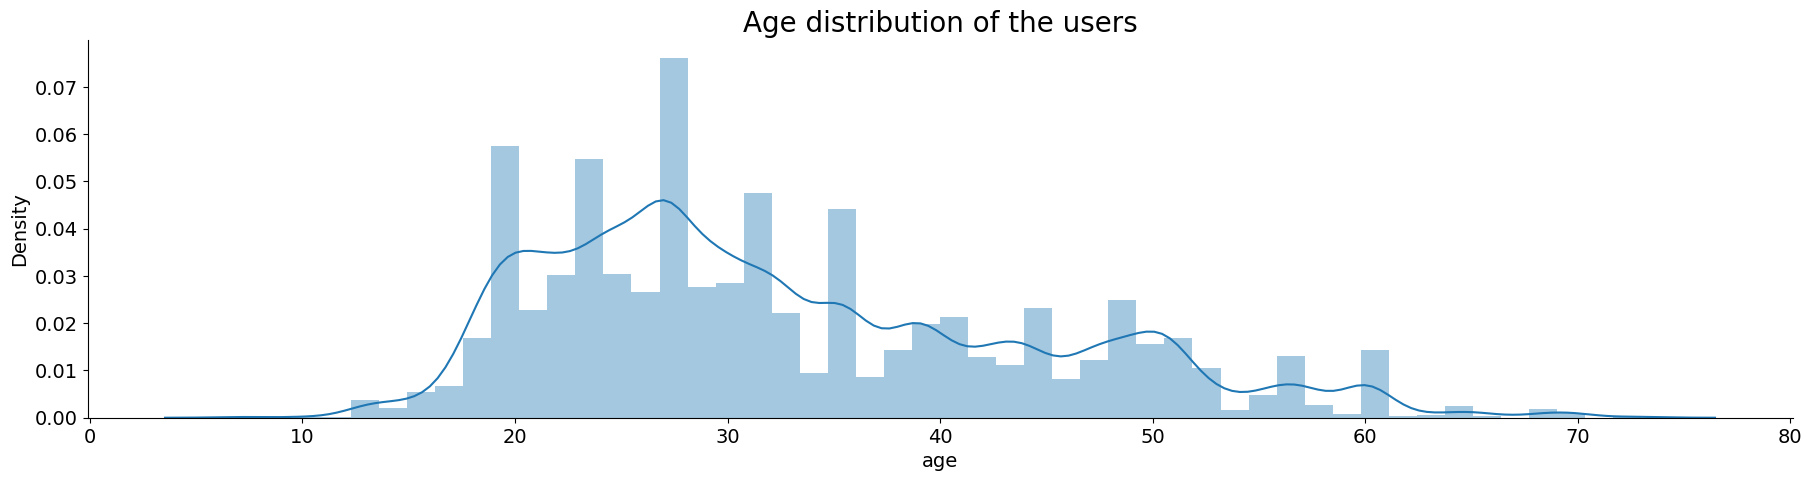

In [3]:
sns.distplot(movielens['age'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Age distribution of the users', fontsize=20)
plt.show()

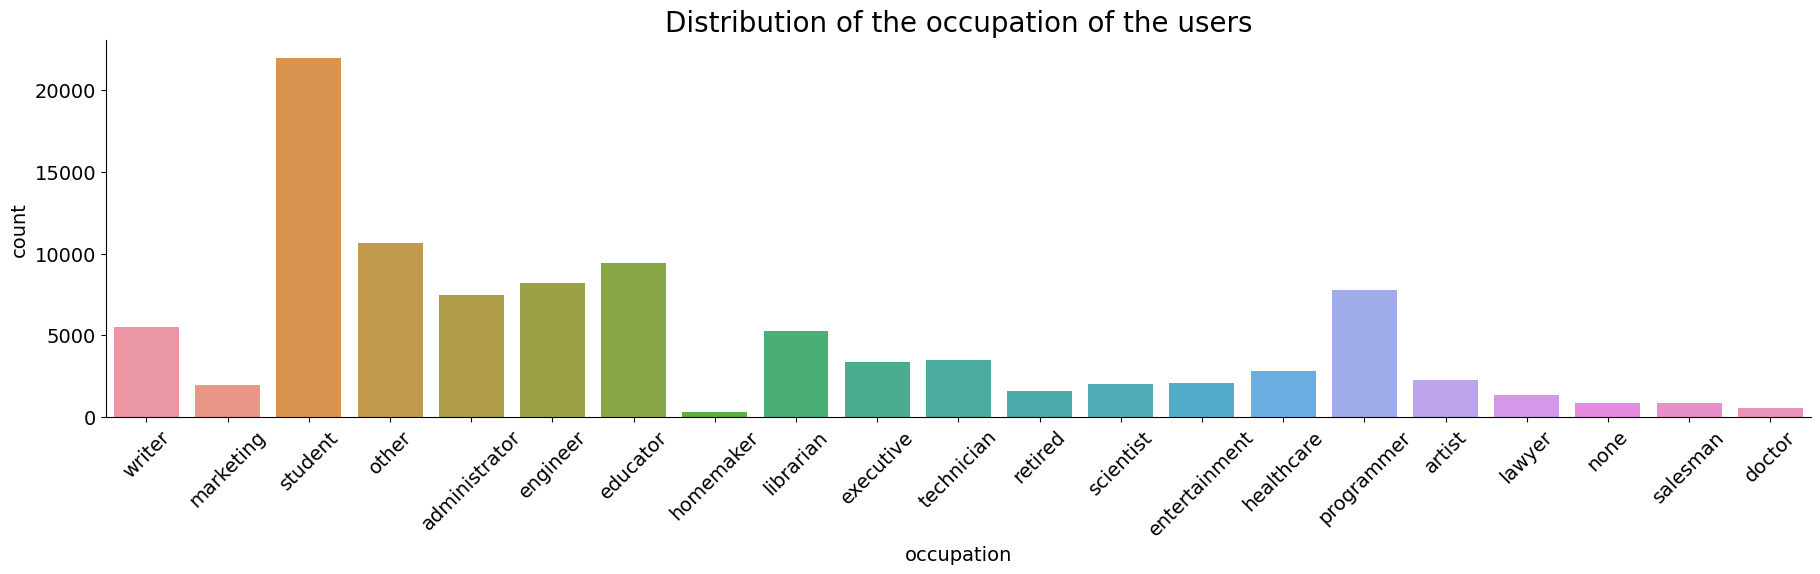

In [4]:
sns.countplot(movielens['occupation'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.title('Distribution of the occupation of the users', fontsize=20)
plt.show()

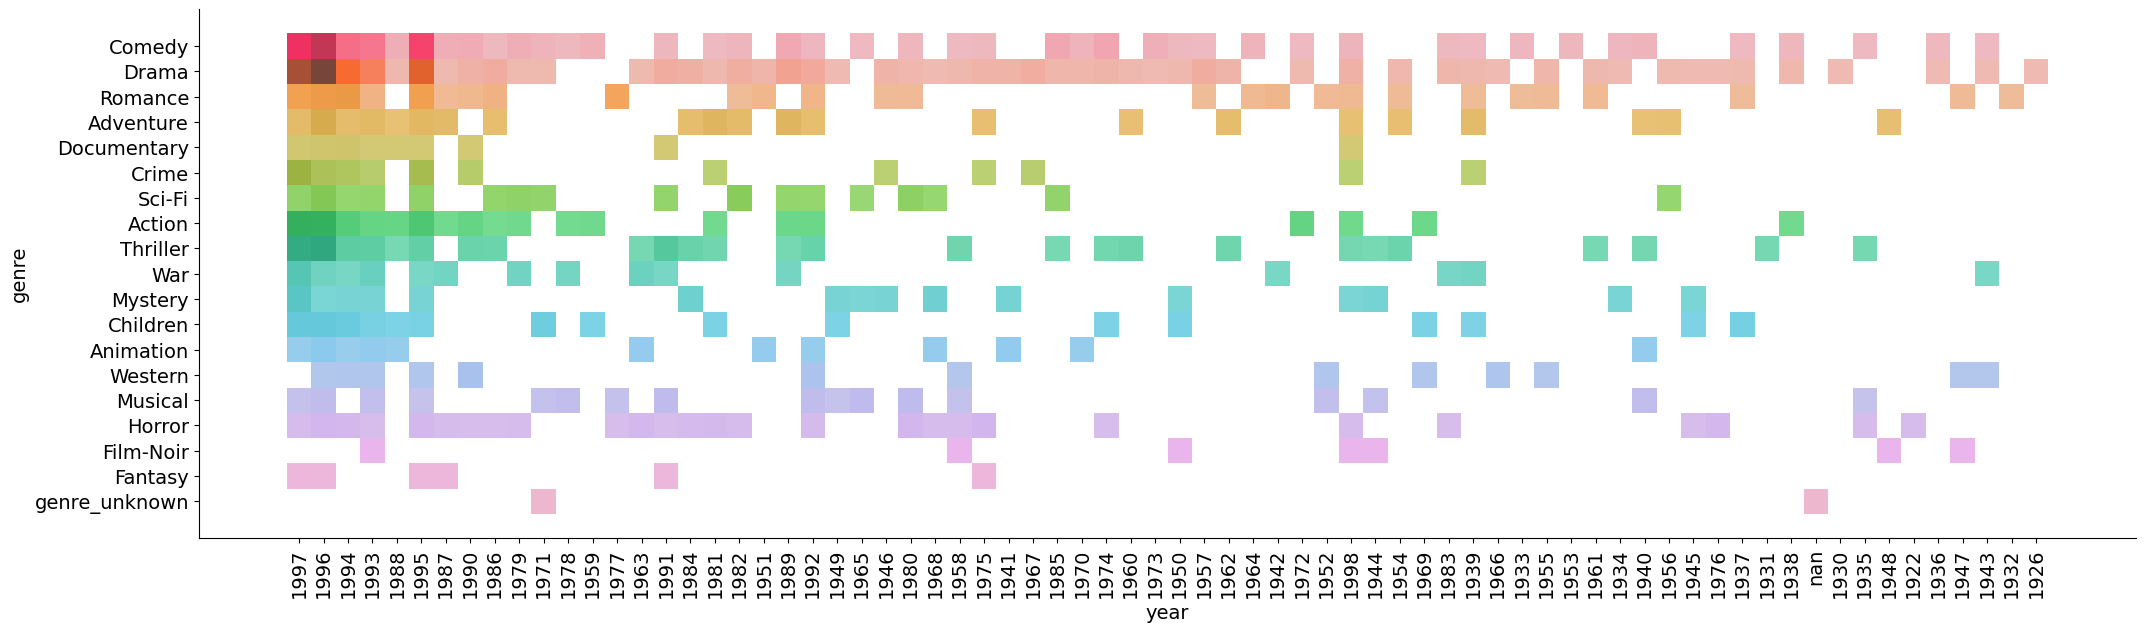

In [5]:
plt.figure(figsize=(25,7))
sns.histplot(data=movielens, x='year', y='genre', hue='genre', legend=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.show()

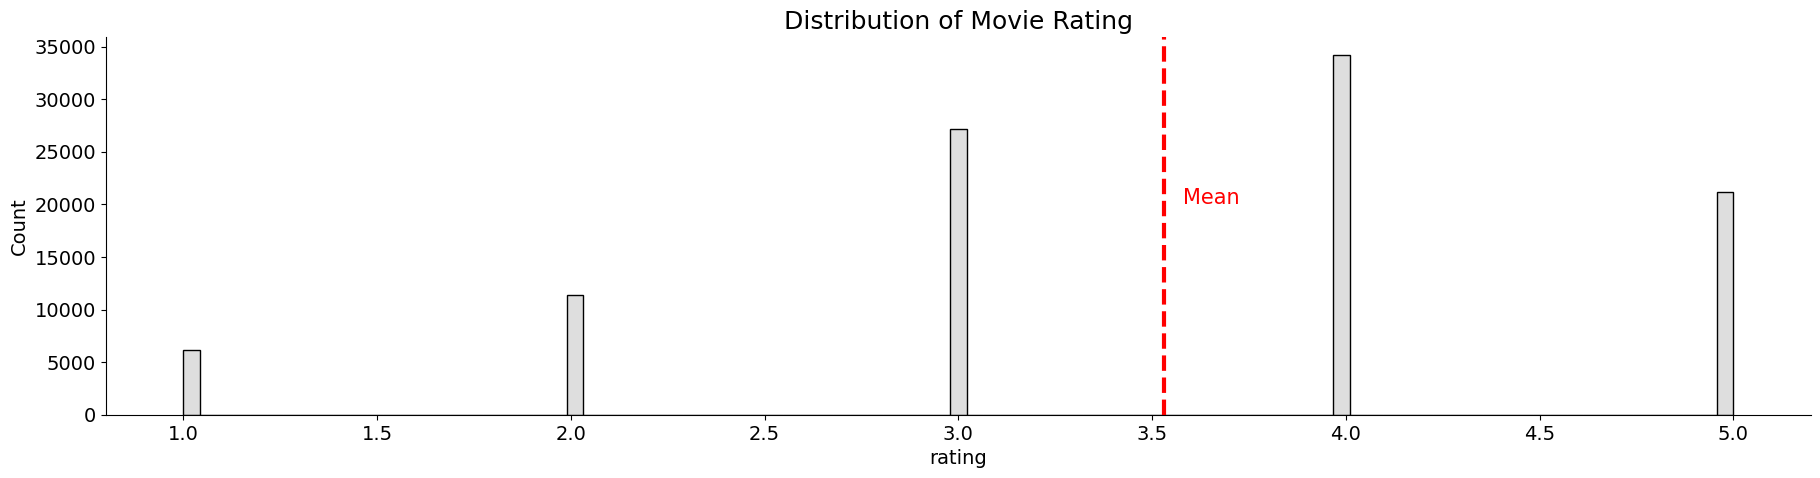

In [6]:
#Visualizing the ratings
sns.histplot(data = movielens, x='rating', color='lightgray')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvline(movielens['rating'].mean(), linestyle='--', lw=3, zorder=1, color='red')
plt.annotate(f'Mean', (movielens['rating'].mean()+0.05, 20000), fontsize=15, color='red')

plt.title('Distribution of Movie Rating', fontsize=18)

plt.show()


**Content-based recommender systems** are a type of recommendation system that uses the characteristics of an item to recommend other items with similar characteristics. 
- This system uses item metadata such as genre, category, description, etc., to recommend items to users. 
- It recommends items that are similar to what a user has liked in the past. This type of recommender system is often used in retail, movies, music, and books.

![](https://miro.medium.com/max/1064/1*mz9tzP1LjPBhmiWXeHyQkQ.png)

**Collaborative filtering recommender systems** are algorithms that make predictions about the ratings or preferences a user may give to an item based on the ratings and preferences of other users. 
- It is a type of algorithm that takes into account **the opinions of others** to generate recommendations for a given user.
- Collaborative filtering is a **popular approach** for building recommender systems as it **does not require** any additional information about the items or users and can be easily scaled to large datasets.

## Filtering by AvgRating

- Filtering data based on average rating helps to identify **which items are most popular** and/or highly rated. This allows a recommender system to better personalize its recommendations to a user by suggesting items that are likely to be of higher quality or **more likely to be enjoyed** by the user. 

- By filtering data based on average rating, a recommender system can ensure that it is only suggesting items to a user that have **some level of popularity** or quality.

In [7]:
#grouping the data based on user id and getting the count of ratings users have given
numRatings = movielens.groupby(['user_id']).count()['rating']
#Resetting the index of numRatings DataFrame
numRatings = numRatings.reset_index()
#Converting the user_id to integer data type
movielens['user_id'] = movielens['user_id'].astype('int')
#Converting the user_id to integer data type
numRatings['user_id'] = numRatings['user_id'].astype('int')
#Merging the two dataframes
df = movielens.merge(numRatings, left_on='user_id', right_on='user_id')

In [8]:
#Renaming columns to much more readable and reusable names
df.rename(columns = {'rating_x':'rating'}, inplace = True)
df.rename(columns = {'rating_y':'numRatings'}, inplace = True)

In [9]:
#Creating a dataframe by grouping the movies and fetching their mean rating
avg_rating = df.groupby(['movie_id']).mean()['rating']
#resetting the index of the dataframe so we can merge this dataframe
avg_rating = avg_rating.reset_index()
#Merging the dataframe to get our final dataframe
df= df.merge(avg_rating, left_on='movie_id', right_on='movie_id')
#Renaming columns to much more readable and reusable names
df.rename(columns = {'rating_x':'rating', 'rating_y':'avgRating'}, inplace = True)
#Rounding off the avgRating to 2 decimal places
df['avgRating'] = round(df['avgRating'],2)
df

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Western,year,genre,all_genres,age,sex,occupation,zip_code,numRatings,avgRating
0,195,241,3.0,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,49,M,writer,55105,39,3.99
1,62,241,3.0,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,31,M,marketing,75240,93,3.99
2,225,241,5.0,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,28,M,student,92103,50,3.99
3,153,241,3.0,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,25,M,student,53703,51,3.99
4,305,241,5.0,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,45,M,other,73132,32,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,166,1309,3.0,892738384,"Walk in the Sun, A (1945)",01-Jan-1945,NaN,http://us.imdb.com/M/title-exact?Walk%20in%20t...,0,0,...,0,1945,Drama,Drama,37,M,other,L9G2B,69,3.00
99996,495,1613,3.0,876070690,"Reluctant Debutante, The (1958)",01-Jan-1958,NaN,http://us.imdb.com/M/title-exact?Reluctant%20D...,0,0,...,0,1958,Comedy,Comedy-Drama,21,F,student,55414,129,3.00
99997,290,1504,4.0,874868647,Killer: A Journal of Murder (1995),06-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Killer:%20A%2...,0,0,...,0,1996,Crime,Crime-Drama,19,M,student,44106,296,4.00
99998,380,1532,4.0,892696106,I Don't Want to Talk About It (De eso no se ha...,01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?De%20Eso%20No...,0,0,...,0,1993,Drama,Drama,33,M,artist,94608,127,4.00


In [10]:
#filtering the data here
df = df[df['avgRating']>2]

Majority of the ratings are within 3.3 and 4 and the average avgRating is 3.5

## Filtering by Number of Ratings

- Filtering data based on the number of ratings is **important** in recommender systems because it helps to ensure that the recommendations given are of high quality. 

- Having a minimum number of ratings for an item **helps to ensure** that the item is being recommended based on real user feedback, and not just on the basis of some random factors. 

- This also helps to **reduce the potential for bias** in the system, as items with fewer ratings may be more likely to be recommended on the basis of their own attributes, rather than on the basis of user feedback.

In [11]:
#Filtering the ratings where movies have gotten atleast 100 ratings by the users.
df = df[df['numRatings']>100]

In [12]:
df

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Western,year,genre,all_genres,age,sex,occupation,zip_code,numRatings,avgRating
5,295,241,4.0,884196057,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,43,F,administrator,16803,147,3.99
7,270,241,4.0,885844495,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,51,M,engineer,22932,278,3.99
8,200,241,4.0,884110598,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,27,M,writer,E2A4H,386,3.99
11,353,241,5.0,891180399,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,29,F,librarian,48197,233,3.99
14,0,241,5.0,889751633,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,1997,Comedy,Comedy,24,M,technician,85711,272,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,307,1514,4.0,887738346,Wings of Courage (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Wings%20of%20...,0,0,...,0,1995,Adventure,Adventure-Romance,60,M,retired,95076,397,4.00
99993,834,1672,3.0,891034023,Mirage (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Mirage%20(1995),0,1,...,0,1995,Action,Action-Thriller,44,F,executive,11577,102,3.00
99996,495,1613,3.0,876070690,"Reluctant Debutante, The (1958)",01-Jan-1958,NaN,http://us.imdb.com/M/title-exact?Reluctant%20D...,0,0,...,0,1958,Comedy,Comedy-Drama,21,F,student,55414,129,3.00
99997,290,1504,4.0,874868647,Killer: A Journal of Murder (1995),06-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Killer:%20A%2...,0,0,...,0,1996,Crime,Crime-Drama,19,M,student,44106,296,4.00


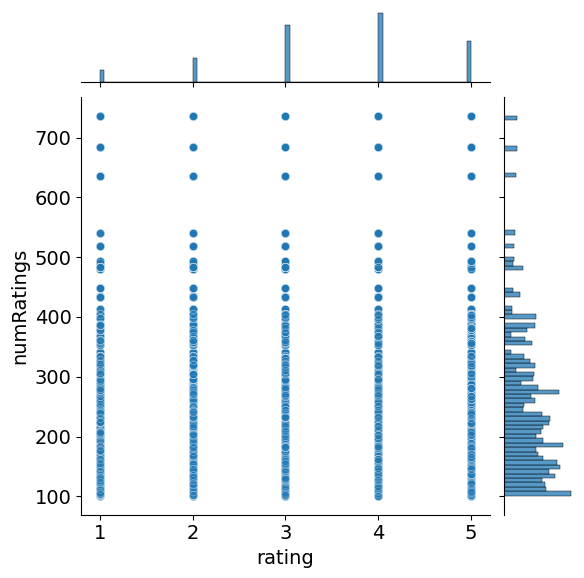

In [13]:
#Creating a jointplot of the numRatings and rating
sns.jointplot(x='rating', y='numRatings', data=df, alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
plt.ylabel('Number of Movie Ratings')
plt.show()

## Cosine Similarity

- Cosine Similarity is a **measure of similarity** between two vectors of an inner product space that measures the cosine of the angle between them. 

- It is **commonly used** in Recommender Systems because it measures the **similarity between items** based on the angle between them, rather than the Euclidean distance which measures the distance between items. 

- This allows the system to provide **more accurate recommendations**, as it takes into account the angle between items rather than just the distance.

In [14]:
#Creating a pivot table where rows are user id, columns are mmovie title, the values are the ratings given to the movie
pivot = df.pivot_table(index='user_id',columns='title',values='rating')

In [15]:
#filling the null values with zero
pivot.fillna(0, inplace=True)

In [16]:
#Importing Cosine Similarity from Sklearn
from sklearn.metrics.pairwise import cosine_similarity
#Calculating similarity score
similarity_scores = cosine_similarity(pivot)

In [17]:
similarity_scores.shape

(361, 361)

## Collaborative Recommender Function

In [18]:
def recommend(title):
    #Fetching Index of the movie
    index = np.where(pivot.columns == title)[0][0]
    #Finding the similar movies using the similarity score and fetching top-n results
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
     
    #initiating a list
    data = []
    #Initiating a loop to loop through the similar items 
    for i in similar_items:
        item = []
        #Creating a temporary dataframe where the title in the database and the search keyword is the same.
        temp_df = df[df['title'] == pivot.columns[i[0]]]
        #Adding the item to the list after dropping duplicates based on the title column in the temporary dataframe
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        #Adding the item object to the data list (for all the similar items)
        data.append(item)
    #return the data list which is essentially the collaborative filtering recommended movies
    return data

In [19]:
#testing out the function we just created
recommend('101 Dalmatians (1996)')

[['Bound (1996)'],
 ['8 1/2 (1963)'],
 ['Brothers in Trouble (1995)'],
 ['Awfully Big Adventure, An (1995)']]

## Content Based Filtering

TFIDF stands for **Term Frequency-Inverse Document Frequency**. 
- It is a **numerical statistic** that is used to measure how important a word is to a document in a collection or corpus. 
- It is a **weighting factor** that reflects how important the word is to a document relative to the other words in the corpus. 
- The TFIDF value **increases proportionally** to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus.

TfidfVectorizer is a type of **feature extraction technique** used in natural language processing. 
- It is used to **transform text into a numerical representation** called a vector, which can then be used as input to a machine learning algorithm. 
- It works by **assigning a weight to each word** in the text based on its frequency in the document and its importance in the corpus. 
- It has been used in applications such as **text classification, document clustering**, and **text summarization**.

In [20]:
#Importing TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
#Initiating TfidfVectorizer object
vectorizer = TfidfVectorizer(ngram_range=(1,2))

In [21]:
#Creating a tfidf matrix
tfidf = vectorizer.fit_transform(df["genre"])

In [22]:
tfidf

<73469x23 sparse matrix of type '<class 'numpy.float64'>'
	with 79887 stored elements in Compressed Sparse Row format>

In [23]:
def search(title):
    # Vectorize the title using the vectorizer
    query_vec = vectorizer.transform([title])
    # Calculate the cosine similarity between the vectorized title and the tfidf matrix
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    # Retrieve the indices of the top 100 most similar titles
    indices = np.argpartition(similarity, -10)[-100:]
    # Select the top 100 titles from the dataframe using the indices
    results = df.iloc[indices].iloc[::-1]
    # Remove any duplicate titles
    results = results.drop_duplicates(subset=['title'])
    # Return a list of the titles
    return results.title.values.tolist()

In [24]:
#testing out the function we just created
search('Toy Story')

["I Don't Want to Talk About It (De eso no se habla) (1993)",
 'Face/Off (1997)',
 'River Wild, The (1994)']

## Why is there a need of Hybrid Recommendation System?

### Cons of Content-based recommendation system?

1. Difficulty in **understanding user preferences**: Content-based recommendation systems require a lot of input from the user in order to make accurate recommendations. This can be difficult for users who are unfamiliar with the product or service, as they may not know how to properly express their preferences.

2. Difficulty in **capturing user context**: Content-based systems can be limited in their ability to capture user context. They are unable to take into account user behavior or mood, which can be important factors in predicting user preferences.

3. **Over-personalization**: Content-based recommendation systems can result in a “filter bubble” effect, where the same recommendations are served to users regardless of their context or preferences. This can lead to a lack of variety and limit users’ exposure to new content.

### Cons of Collaborative recommendation system?

1. Dependency on **User Input**: Collaborative recommendation systems rely heavily on user input, which can be unreliable and inaccurate. If a user provides incorrect information, it can lead to inaccurate recommendations.

2. **Privacy Concerns**: Another potential downside of collaborative recommendation systems is the potential privacy concerns. Depending on what type of information is being collected, users may be concerned about how their data is being used.

3. Difficulty of **Implementing**: Implementing a collaborative recommendation system can be complex and time consuming. It requires a lot of data processing and analysis to create accurate recommendations.

In [25]:
def content_recommendation(title):
    """
    Returns a list of content recommendations based on the provided title.
    The recommendations are determined by calculating the cosine similarity between the genre of the provided title and
    the genres of other content in the dataframe, df. The top 100 most similar content are selected, and duplicates are
    removed to return a list of at most 10 content recommendations.
    """
    # Initialize TfidfVectorizer and fit it to the genres in the dataframe
    vectorizer = TfidfVectorizer(ngram_range=(1,2))
    tfidf = vectorizer.fit_transform(df["genre"])
    # Transform the provided title into a vector using the vectorizer
    query_vec = vectorizer.transform([title])
    # Calculate the cosine similarity between the title vector and the genre vectors
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    # Select the indices of the top 100 most similar content
    indices = np.argpartition(similarity, -10)[-100:]
    # Select the rows of the dataframe corresponding to the selected indices, and sort them in descending order of similarity
    results = df.iloc[indices].iloc[::-1]
    # Remove duplicates based on the 'title' column
    results = results.drop_duplicates(subset=['title'])
    # Fetching only the title values of the movie and converting it to a list
    content_reco = results.title.values.tolist()
    # Return the list of the titles of the content based recommended content
    return content_reco 

def collaborative_recommendation(title):
    """
    This functions leverages the collaborative filtering approach for recommending movies based on the ratings given to them 
    by the users. An index of the array is taken out first and the index is given for the similarity score calculation and 
    top 5 results are returned.
    """
    
    #Fetching Index of the movie
    try:
        index = np.where([pivot.columns==title])[0][0]
    except:
        pass
    
    #Finding the similar movies using the similarity score and fetching top-n results
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    #initiating a list
    data = []
    #Initiating a loop to loop through the similar items 
    for i in similar_items:
        item = []
        #Creating a temporary dataframe where the title in the database and the search keyword is the same.
        temp_df = df[df['title'] == pivot.columns[i[0]]]
        #Adding the item to the list after dropping duplicates based on the title column in the temporary dataframe
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        #Adding the item object to the data list (for all the similar items)
        data.append(item)
    #return the data list which is essentially the collaborative filtering recommended movies
    return data

def hybrid_recommendation(title):
    """
    This function utilizes the capabilities of the earlier functions to provide a single set of unique recommendations 
    utilizing content and collaborative filtering (hybrid recommendations). The output is a list of those recommendations.
    """
    #get the list of recommended movies from the content-based system
    content_recommended_movies = np.unique(content_recommendation(title)).tolist()
    
    #get the list of recommended movies from the collaborative filtering system
    collaborative_recommended_movies = np.unique(collaborative_recommendation(title)).tolist()
    
    #combine the two lists
    recommended_movies = (content_recommended_movies + collaborative_recommended_movies)
    
    #return the list of recommended movies
    return recommended_movies

In [26]:
#testing out the function we just created
hybrid_recommendation('Killer: A Journal of Murder (1995)')

['Face/Off (1997)',
 "I Don't Want to Talk About It (De eso no se habla) (1993)",
 'River Wild, The (1994)',
 'Airheads (1994)',
 'Bogus (1996)',
 'Dadetown (1995)',
 'Deconstructing Harry (1997)']